# Homework 1: Linear Systems Part I

## General Instructions
 
* To pass this assignment requires to complete the present Jupyter notebook by
    + providing correct answers to all the theoretical exercises, and by
    + providing complete and runnable computer code producing the correct results to all the computational problems.

* For the theoretical exercises, please include intermediate steps to
  explain how you arrive at your solution.
* Don't overengineer your code, keep it as simple and readable as possible   and provide short code comments to help other people understanding your     code.
* Please provide also a short summary and discussion of your results 
  including the requested output (e.g., tables, graphs etc.).

* Up to 3 students can jointly submit the solutions (4 students if at
  least one is an exchange student) **Only 1 student from each group** 
  is supposed to submit them.  

##### Deadline for submission of your solutions is **5th of September**.


###  Happy coding!

**And before we start:**

Executing the following cell loads a non-default css style for the notebook. 
Make sure that you download the corresponding css file  `tmas4215.css` from the `lab/styles` Blackbord folder. Note that the following code snippet assumes that the file resides inside the folder `../styles/` relative to the folder where you stored this notebook on you computer.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

### Useful code snippets

We provide a few of code snippets to get you
started in Python. Three dots $\ldots$ indicate places where you have
to fill in code. We start with importing the necessary scientific libraries
and define a name alias for them.

In [2]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

## Problem 1
Provide a complete proof of Theorem 2 from Lecture 2,
following the outline provided there. 

Theorem 2: Let $A ∈ R_(n,n)$ with $n > 2$ and assume that every leading
principal submatrix of order k with $1 \leq k \leq n − 1$ is invertible. Then A
admits a LU factorization, where L is unit lower triangular of order n, and
R is upper triangular of order n.

Proof by induction.
Base case:

$\begin{equation}
A = \begin{bmatrix}
a&b\\
c&d\\
\end{bmatrix}
= \begin{bmatrix}
1&0 \\
l&1 \\
\end{bmatrix}\begin{bmatrix}
m&n \\
0&r \\
\end{bmatrix}=LU = \begin{bmatrix}
m  & n \\
lm & ln+r \\
\end{bmatrix}
\end{equation}$

provides the four sets of equations 

$\begin{equation}
m = a,\quad n = b,\quad l = \frac{c}{m} = \frac{c}{a} ,\quad r = d-ln
\end{equation}$

thus if $a = 0$, neither $l$ nor $r$ will be defined, and a LU-facorisation is not possible.

conclusion: $a = 0$ causes there to be no LU-factorization $\Rightarrow det(a) \neq 0 \Rightarrow$ the principal submatrix of a two by two matrix must have a non-zero determinant.

induction:
Given that a $NxN$ submatrix $A^{n}$ is LU-factorizable, what constraints do we need  so that the $(N+1)x(N+1)$ matrix $A$ is LU-factorizable.

$\begin{equation}
A = \begin{bmatrix}
A^{n}&\vec{b}\\
\vec{c}&d\\
\end{bmatrix}
= \begin{bmatrix}
L^{n}&0 \\
\vec{l}&1 \\
\end{bmatrix}\begin{bmatrix}
U^{n}&\vec{n} \\
0&r \\
\end{bmatrix} = \begin{bmatrix}
L^{n}U^{n}  & L^{n}\vec{n} \\
\vec{l}U^{n} & \vec{l}\vec{n}+r \\
\end{bmatrix} = LU
\end{equation}$

this gives rize to four equations,

$\begin{equation}
A^{n} = L^{n}U^{n},\quad \vec{b} = L^{n}\vec{n},\quad \vec{c} = \vec{l}U^{n} ,\quad d = \vec{l}\vec{n}+r
\end{equation}$.

To be able to solve for $\vec{n}$ and $\vec{l}$ (and r follows) from $\vec{b} = L^{n}\vec{n}$ and $\vec{c} = \vec{l}U^{n}$ we have to have both $U^{n}$ and $L^{n}$ to be invertable, which means
$det(U^{n}) \neq 0$ and $det(L^{n}) \neq 0 \Rightarrow det(A^{n}) = det(L^{n}U^{n}) = det(L^{n})det(U^{n}) \neq 0$ 

Thus showing that for any N by N matrix, every leading
principal submatrix must be invertable.




## Problem 2

Given matrix $A \in \mathbb{R}^{n,n}$ and $\boldsymbol{b} \in \mathbb{R}^n$,
the goal of this problem set is to compute the solution $\boldsymbol{x}$
to the linear system $A \boldsymbol{x} = \boldsymbol{b}$ numerically
by implementing the algorithms $A = LU$ factorization (whenever possible), and the backward and forward substitution steps in ```Python```.

As a preliminary step, please make sure that you have import ```numpy```  as ```np``` by executing the cell right under "Useful code snippets".

**a)** Implement a ```Python``` function ```forward_sub```:

In [3]:
def forward_sub(L, b):
    "This will only work for unit lower matrixes (unless you uncomment down below)"
    L = np.array(L) #just in case
    b = np.array(b) #just in case
    
    z = np.zeros(L.shape[1]) # rows
    #start first in the upper part of the system
    for i in range(L.shape[0]): #iterating through rows of L
        z[i] = (b[i] - z[:i]@(L[i,:i]).T) #/ L[i,i]  """makes it work generally if uncomment"""   
    return z

**b)** Next, implement a ```Python``` function ```backward_sub```:

In [4]:
def backward_sub(U, y):
    U = np.array(U) #just in case
    y = np.array(y) #just in case
    
    x = np.zeros(U.shape[1])
    #start at bottom
    for i in range(U.shape[0]-1, -1,-1):#rows of U
        x[i] = (y[i] - U[i, i+1:]@(x[i+1:]).T) / U[i,i]
    return x

**c)** Now, implement a Python function which computes for a given matrix $A \boldsymbol{R}^{n,n}$ the $LU$ factorization of $A = LU$ ((if possible).
You can either base your implemenentation on the Banachiewicz or Crout method (explain in Lecture 3) or any method
you might dig up from the literature.
If you want, you can take some inspiration from the reference **YEB**, Chapter 3.3, see Program 4, 5, 6.
$\begin{equation}
x = \frac{y}{z}
\end{equation}
$
If the factorization fails without permutating $A$, you should at least be so kind
and raise an ```Exception```, see [Python 3 tutorial, 8. Errors and Exceptions](
https://docs.python.org/3/tutorial/errors.html#errors-and-exceptions).
More specifically, you can simply raise an [NotImplementedError](https://docs.python.org/3/library/exceptions.html#NotImplementedError) exception.

Of course, you can also implement the full $PA = LU$ decomposition if you don't want to throw Exceptions around :).

In [5]:
def lu_factor(A):
    """With pivoting"""
    A = np.array(A,dtype=np.float64) # just in case
    P = np.arange(A.shape[0]) # permutation vector
    n = A.shape[0]
    
    U = np.zeros((n,n),dtype = np.float64) # U starts with only zeros
    L = np.identity(n,dtype = np.float64) # L starts as Id(n)
    
    for i in range(n): #rows in A[P]
        #find |A[:,i]|_infinity and switch places with the row containing it
        index = np.argmax(np.abs(A[P[i:],i]))
        temp = P[i]
        P[i] = P[i + index] #there is an i here becouse index starts at i
        P[i + index] = temp
        
        for j in range(n):
            if j<i: 
                #solving the L[i,:] row (will not do anything the first loop of "i")
                L[i,j] = (A[P[i],j] - L[i, :j]@U[:j,j]) / U[j,j]
            else:
                #solving the U[i,:] row 
                U[i,j] = A[P[i],j] - L[i,:i]@U[:i,j]
            
    return L, U, P
    
    
    
    

**d)** Next, combine the Python functions you just implemented in a)-b) to provide
solver for the linear system $A \boldsymbol{x} = \boldsymbol{b}$ based on
a given $A = LU$ factorization. 

In [6]:
def lu_solve(L, U, b):
    # Step 1: Solve Uy = b using forward substitution
    z = forward_sub(L,b)
    
    # Step 2: Solve Lx = y using backward substitution
    
    
    return backward_sub(U,z)

**e)** Finally, write a ```linear_solve``` function  by simply combining your ```lu_factor``` and ```lu_solve```. 

In [7]:
def linear_solve(A, b):
    L, U, P = lu_factor(A)
    return lu_solve(L,U,b[P])

**f)** Use you brand new `linear_solve` function to compute the solution to a non-trivial linear system. Here non-trivial means that $n > 4$ :) and a non-zero right-hand side $\boldsymbol{b}$.

*Hint*: To check whether your code computes the "exact" result, you can use the 
method of **manufactured solution**. In the case of linear systems $A \boldsymbol{x} = \boldsymbol{b}$ this means that for **given/chosen** matrix $A$ and solution vector $\boldsymbol{x}$, you simply compute the resulting right-hand side vector 
$\boldsymbol{b} = A \boldsymbol{x}$ to construct an example where you know the solution.
When you now solve $A\boldsymbol{x} = \boldsymbol{b}$ starting from $A$, $\boldsymbol{b}$, your implementation should return the correct $\boldsymbol{x}$.

In [8]:
"""Testing this"""
A = np.array([[ 3,  -7,  -2,2,20],
              [-3,5,1,0,4],
              [6,-4,0,5,17],
              [-9,5,-5,12,5],
             [1,9,-3,-11,13]])
"""Not to be used"""
#x = np.array([1,1,2,3,5])
#x = x.T
#print(A@x)
"""#############"""

b = np.array([98,24,102,47,36])

print(linear_solve(A,b))

[1. 1. 2. 3. 5.]


## Problem 3

The objective of this problem set is two-fold. First, we will have an actual look 
at the complexity of the linear solver you implemented in the previous problem.
Second, we want to illustrate that the finite precision of real numbers
can matter very much in actual computations.

We start by introducing the **Hilbert Matrix** $H_n$ of order $n$ by
$$ 
(H_n)_{ij} = \dfrac{1}{i+j-1} \quad \text{for } 1 \leqslant i,j \leqslant n.
$$


The Hilbert matrix is readily available in the ```scipy.linalg``` module, so you simply
type, e.g

```python
n = 3
A = la.hilbert(n)
```
Recall that we imported the ```linalg``` module and renamed it to ```la``` via the
```python 
import scipy.linalg as la
``` 
line at the beginning of this notebook.

**a)** 
Define the trivial righ-hand side $\boldsymbol{b} = \boldsymbol{0}$
and measure the executation time for the various step in your linear_solver.
To do so you can use ```%timeit``` and ```%%timeit``` magic functions in IPython,
see [corresponding documentation](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit).

In a nutshell, ```%%timeit``` measures the executation time of an entire cell, while ```%timeit```
only measures only the executation time of a single line, e.g. as in

```python
%timeit my_function()
```

Note that the latter might not play well with functions returning arguments.
To this end, you can simply (re)write a linear solver in  3 lines (1 line per cell)
starting from calling your  ```lu_factor``` function and
copy-pasting the lines from Step 1 to Step 2 in the ```linear_solve()``` function.
Then use the ```%%timeit``` to measure the executation time of each cell.

To get accurate timeing results, ```timeit``` automatically runs the same code multiple
times in  a loop, and repeats that measurement a number of times.
The actual number of loops and repeats is selected automatically and will be printed out at the end. They can also be manually adjusted by using

```
%%timeit -n<number_of_loops> -r<number_of_repeats>
```


Now for $n = 500, 1000, 2000, 4000$, measure the executation time for each step in the linear solve
(factorizing, forward and backward substitution) and plot
the execution time $t$ against the number of unknowns $n$ in a $\log$-$\log$ plot,
that is, $\log(t)$ against $\log(n)$.
(Matplotlib has specific functions for log-log plotting)

In [9]:
n = 4000
A = la.hilbert(n)
b = np.zeros(n)
L,U,P = lu_factor(A)
z = forward_sub(L,b[P])
x = backward_sub(U,z)


C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':


In [10]:
%%timeit -n1 -r1
(L ,U, P) = lu_factor(A) 

C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


2min 24s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [30]:
%%timeit 
z = forward_sub(L,b[P])

C:\Users\Gunna\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in matmul
  if __name__ == '__main__':


5.6 ms ± 647 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit 
x = backward_sub(U,z)

2.73 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


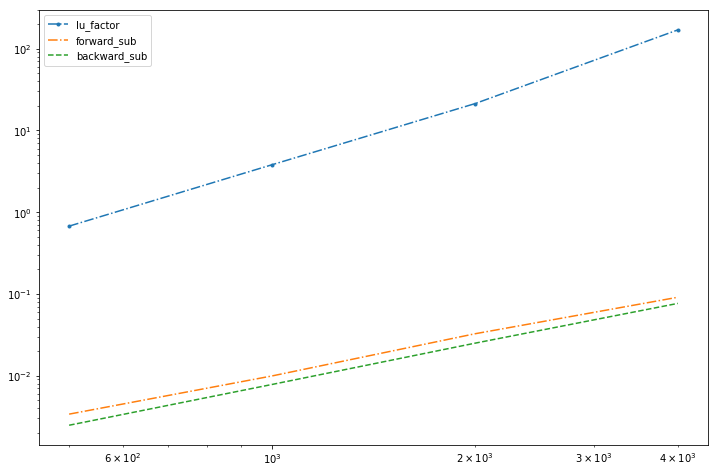

In [32]:
"""statistics when running; not a very good pc"""
N    = [500, 1000, 2000, 4000] #size of H
Fac  = [676e-3, 3.81,21.3, 170] #factorization time
Forw = [3.39e-3, 9.94e-3,32.6e-3,91.2e-3] #forwards_sub time
Bac  = [2.48e-3, 7.82e-3,25e-3,76.7e-3] #backwards_sub time
plt.figure(figsize = (12,8))

plt.loglog(N,Fac,'-..', label = "lu_factor")
plt.loglog(N,Forw,'-.', label = "forward_sub")
plt.loglog(N,Bac,'--', label = "backward_sub")

plt.legend()
plt.show()


Obviusly, the factoring was the one with the highest complexity. Aproximately $\mathcal{O}(n^{3})$, while forwards and backwards substitution has around $\mathcal{O}(n^{2})$ (abit less **here** by the look of it). The increase of the time required for factoring when $n = 4000$ is most likely caused by memory-allocation, or my pc overheating and me continuing with task $3b$. 

**b)** Next, define a non-trivial vector $\boldsymbol{b}$ by
$$
b_i = \sum_{j=1}^n (j/(i+j-1)) 
$$
so that the **exact solution** to the lineary system $H_n \boldsymbol{x} = \boldsymbol{b}$ is
the vector $\boldsymbol{x}_{\mathrm{ex}}$  with elements $x_{\mathrm{ex},i} = i$.
Now solve the system using your ```linear_solve``` function for $n = 2, 4, 8, 16$, print the computed solution vector $\boldsymbol{x}_{\mathrm{comp}}$ and compare it with $\boldsymbol{x}_{\mathrm{ex}}$. In particular compute 

$$\|\boldsymbol{x}_{\mathrm{ex}}-\boldsymbol{x}_{\mathrm{comp}}\|_2.$$

What do you observe? Can you explain your observations?

*Hint*: It can be shown that the condition number $\kappa_2(H_n)$ scales like
$$
\kappa_2(H_n) \sim \dfrac{\left(\sqrt{2}+1\right)^{4n+4}}{2^{15/4}\sqrt{\pi n}}
\text{as } n \to  \infty.
$$

Tabulate the approximate values of $\kappa_2(H_n)$ for $n = 2, 4, 8, 16$.

This exercise was heavily inspired by Section 2.8 in **BLUB**.

In [33]:
def gen_bx(n): #generates b, xe
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            b[i] += (j+1)/(i+j+1)
    return b, (np.arange(n)+1)

norms = []
for n in [2,4,8,16]:
    H = la.hilbert(n)
    b,xe = gen_bx(n)
    x = linear_solve(H,b)
    diff = xe-x
    print(x)
    
    norms.append(np.linalg.norm((diff)))

print("Norms: ",norms)
"""looking more closely at n == 16"""
n = 16
b,xe = gen_bx(n)
H = la.hilbert(n)
L, U, P = lu_factor(H)
#print(L@U - H[P])
#print(forward_sub(L,b[P]))
#print(backward_sub(U,forward_sub(L,b[P])))



    


[1. 2.]
[1. 2. 3. 4.]
[1.         2.00000001 2.99999993 4.00000041 4.99999888 6.00000161
 6.99999883 8.00000033]
[   0.99999289    2.00109751    2.95827388    4.68098214   -0.89582869
   35.85675954  -84.49176048  172.27435607 -132.84379957    1.77831251
   67.03984513  219.70414935 -512.17337844  517.93051322 -218.24808121
   59.42857143]
Norms:  [1.4895204919483639e-15, 1.250173517521768e-12, 2.3463225262729594e-06, 829.937313275053]


When looking at the $x_{comp}$, it is computed correctly(almost) for $n=2,4,8$ but it completely breakes down for $n = 16$. With closer inspection it seems that when forward and backward substituting the sizes of the elements vary immensly(several orders of magnitude, 15 at most for our intermidiate y-variable), and when computing the solution of these two steps, the accuracy of our 15 decimals is not sufficient. The LU factorization is not to blame, since there is no difference between $LU and PH$. The problem is, as given by the hint, very ill-conditioned. Lets approximate the condition-number using some linalg.

In [34]:
for n in [2,4,8,16]:
    H = la.hilbert(n)
    Hinv = np.linalg.inv(H)
    Kappa = np.linalg.norm(H)*np.linalg.norm(Hinv)
    print("n = %d,    K = %.2e" % (n,Kappa) )

n = 2,    K = 1.93e+01
n = 4,    K = 1.56e+04
n = 8,    K = 1.55e+10
n = 16,    K = 6.46e+17


Obviously these numbers are extreme, and explain the great difference in the computed result and the theoretical. We can use the given formula, and see if we get approximately the same answers for the condition numbers.

In [35]:
def Kn(n):
    return ((2**(.5)+1)**(4*n+4))/((2**(15./4.))*((np.pi*n)**.5))

for n in [2,4,8,16]:
    print("n = %d,    K = %.2e" % (n,Kn(n)) )


n = 2,    K = 1.16e+03
n = 4,    K = 9.49e+05
n = 8,    K = 8.93e+11
n = 16,    K = 1.12e+24


Not exactly the same results, but then again, $n$ is nowhere close to infinity.